Epoch 0 - Cost: 9.5082
Epoch 100 - Cost: 1.1096
Epoch 200 - Cost: 0.3922
Epoch 300 - Cost: 0.2994
Epoch 400 - Cost: 0.2824
Epoch 500 - Cost: 0.2776
Epoch 600 - Cost: 0.2752
Epoch 700 - Cost: 0.2736
Epoch 800 - Cost: 0.2722
Epoch 900 - Cost: 0.2710

Evaluation Metrics:
MSE  = 0.6114
RMSE = 0.7819
R²   = 0.5334


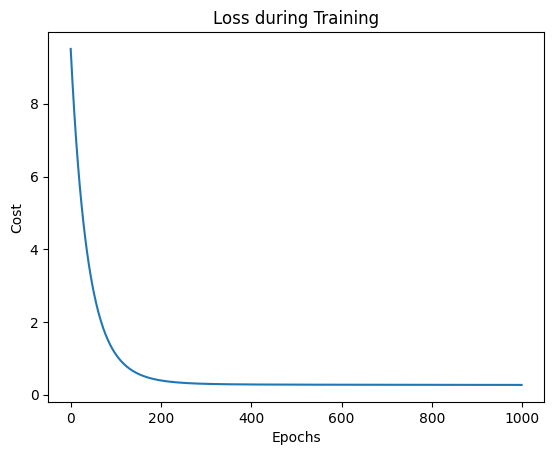

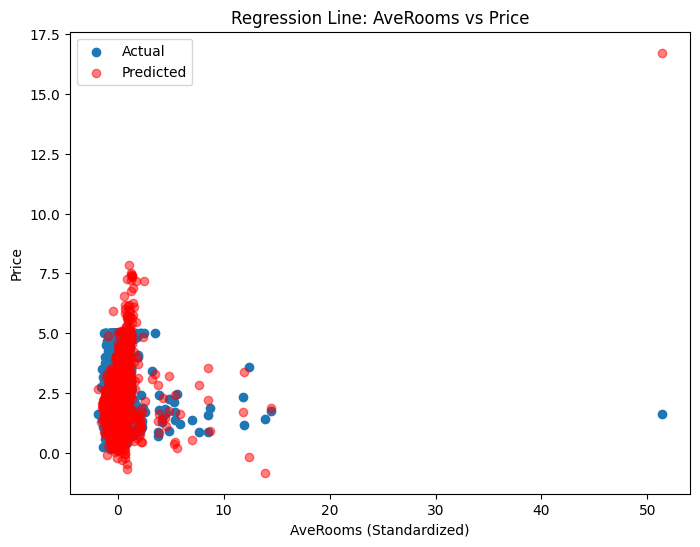

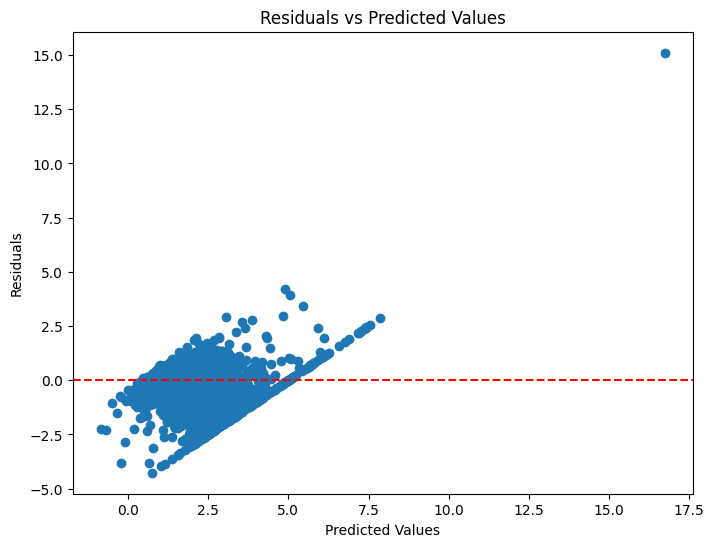

In [1]:
# Exp 2 :Linear Regression for Predictive Modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['price'] = data.target  # rename target for consistency

# Optional: normalize features
df[data.feature_names] = (df[data.feature_names] - df[data.feature_names].mean()) / df[data.feature_names].std()

# Step 2: Split into features and target
X = df.drop('price', axis=1).values
y = df['price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize weights and bias
w = np.random.randn(1, X_train.shape[1])
b = 0
learning_rate = 0.01

# Forward propagation
def for_prop(w, b, X):
    z = np.dot(w, X.T) + b
    return z.T

# Cost function (Mean Squared Error)
def cost(z, y):
    m = y.shape[0]
    j = (1 / (2 * m)) * np.sum(np.square(z - y))
    return j

# Backward propagation
def back_prop(z, y, X):
    m = y.shape[0]
    dz = z - y
    dw = (1 / m) * np.dot(dz.T, X)
    db = (1 / m) * np.sum(dz)
    return dw, db

# Gradient descent step
def gradient_descent(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

# Training loop
def linear_model(X_train, y_train, X_test, y_test, epochs):
    global w, b
    losses = []
    for i in range(epochs):
        z = for_prop(w, b, X_train)
        c = cost(z, y_train)
        dw, db = back_prop(z, y_train, X_train)
        w, b = gradient_descent(w, b, dw, db, learning_rate)
        losses.append(c)
        if i % 100 == 0:
            print(f"Epoch {i} - Cost: {c:.4f}")
    return w, b, losses

# Train the model
w, b, losses = linear_model(X_train, y_train, X_test, y_test, epochs=1000)

# Predict
y_pred = for_prop(w, b, X_test)

# Evaluation
mse = np.mean(np.square(y_test - y_pred))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

# Plot: Loss over epochs
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Loss during Training")
plt.show()

# Plot: Regression line (for one feature, e.g., AveRooms)
feature_index = data.feature_names.index('AveRooms')
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, feature_index], y_test, label='Actual')
plt.scatter(X_test[:, feature_index], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel("AveRooms (Standardized)")
plt.ylabel("Price")
plt.title("Regression Line: AveRooms vs Price")
plt.legend()
plt.show()

# Plot: Residuals
residuals = y_pred - y_test
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()